# 4. Functions and Classes: Exercise Solutions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Functions
Define the following functions and show some sample outputs.  
1) Factorial of n: $1 \times 2 \times \cdots \times n$.

In [2]:
def factorial(n):
    """factorial of n"""
    f = 1
    for i in range(n):
        f = f * (i+1)
    return f

In [3]:
def factorial(n:int):
    """factorial of n"""
    if n < 0 or type(n)!=int:
        print('n should be non-negative integer.')
        return
    elif n==0:
        return 1
    else:
        return factorial(n-1)*n

In [4]:
factorial(-1)

n should be non-negative integer.


In [5]:
for n in range(10):
    print(factorial(n))

1
1
2
6
24
120
720
5040
40320
362880


2) For a circle of radius r (default r=1), given x coordinate, return possible y coordinates (i.e., both positive and negative).

In [6]:
def circley(x, r=1):
    """y coordinate for given x for a circle of radius r"""
    if abs(x) > r:
        return
    elif abs(x) == r:
        return 0.
    else:
        y = np.sqrt(r**2 - x**2)
        return y, -y

In [7]:
X = np.linspace(-1.2, 1.2, 13)
for x in X:
    print(circley(x))

None
0.0
(0.5999999999999999, -0.5999999999999999)
(0.8, -0.8)
(0.916515138991168, -0.916515138991168)
(0.9797958971132712, -0.9797958971132712)
(1.0, -1.0)
(0.9797958971132712, -0.9797958971132712)
(0.9165151389911681, -0.9165151389911681)
(0.8, -0.8)
(0.6000000000000003, -0.6000000000000003)
(2.1073424255447017e-08, -2.1073424255447017e-08)
None


In [8]:
for i in range(-6, 7):
    print(circley(0.2*i))

None
0.0
(0.5999999999999999, -0.5999999999999999)
(0.7999999999999999, -0.7999999999999999)
(0.916515138991168, -0.916515138991168)
(0.9797958971132712, -0.9797958971132712)
(1.0, -1.0)
(0.9797958971132712, -0.9797958971132712)
(0.916515138991168, -0.916515138991168)
(0.7999999999999999, -0.7999999999999999)
(0.5999999999999999, -0.5999999999999999)
0.0
None


3) Draw a star-like shape with n vertices, every m-th vertices connected, with default of n=5 and m=2.

In [9]:
def star(n=5, m=(n-1)//2, r=1):
    """Draw a star with n>=5 vertices."""
    if n < 3:
        print('n should be 3 or more.')
        return
    if m == None:
        m = (n-1)//2
    xy = np.zeros((n+1, 2))
    th = 2*np.pi*m/n
    for i in range(n):
        xy[i] = [r*np.sin(i*th), r*np.cos(i*th)]
    xy[-1] = xy[0]
    plt.plot(xy[:,0], xy[:,1])
    plt.axis('square')
    plt.axis('off')

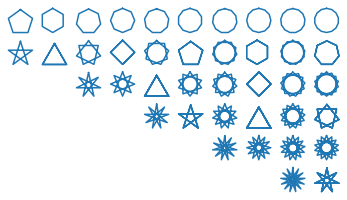

In [10]:
N = 10
M = 7
for n in range(5, 5+N):
    for m in range(1, min((n+1)//2, M)):
        plt.subplot(M, N, (m-1)*N + n-4)
        star(n, m)

4) Any function of your interest

### 2. Classes
1) Define the `Vector` class with the following methods and test that they work correctly.  
* `norm`, `normalize`: as in the previous class (use L^p norm, with default p=2).
* `scale(s)`: multiply each component by scalar s.
* `dot(v)`: a dot product with another vector v.

In [11]:
class Vector:
    """A class for vector calculation."""
    default_p = 2
    
    def __init__(self, arr):  # make a new instance
        self.vector = np.array(arr)     # array is registered as a vector
    
    def norm(self, p=None):
        """Give the L^p norm of a vector."""
        if p == None:
            p = self.default_p
        y = self.vector ** p
        z = np.sum(y) ** (1/p)
        return(z)
    
    def normalize(self):
        u = self.vector/self.norm()
        self.vector = u
    
    def scale(self, s):
        u = s * self.vector
        self.vector = u
    
    def dot(self, v):
        return(np.sum(self.vector * v.vector))

In [12]:
x = Vector([0, 1, 2])
x.vector

array([0, 1, 2])

In [13]:
x.scale(3)
x.vector

array([0, 3, 6])

In [14]:
y = Vector([1, 2, 3])
x.dot(y)

24

2) Save the class Vector as a module `vector.py`.

3) Import the module and test how it works.

In [15]:
import vector

In [16]:
import importlib

In [17]:
importlib.reload(vector) # This is needed after updating a module

<module 'vector' from '/Users/doya/Dropbox (OIST)/Python/ComputationalMethods/vector.py'>

In [18]:
x = vector.Vector([0, 1, 2])
x.vector

array([0, 1, 2])

In [19]:
x.norm(p=1)

3.0